<a href="https://colab.research.google.com/github/Epistimonas/imagenes/blob/master/Copia_de_lesson3_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [71]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

# Testing an existing classifier

In [0]:
IMAGE_SIZE = (224, 224)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

In [0]:
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

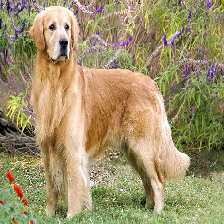

In [75]:
test_image = get_file('img.jpg','https://www.allshepherd.com/wp-content/uploads/2019/08/german-shepherd-sloping-back-vs-straight-back.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image

In [76]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

In [77]:
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

In [78]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

208

In [0]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

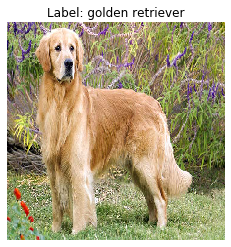

In [80]:
predicted_class_name = imagenet_labels[predicted_class]

plt.axis('off')
plt.title("Label: " + predicted_class_name, color = 'black')
plt.imshow(test_image)
plt.show()

# Transfer Learning

## Build the dataset

In [0]:
class_names = ['batman','superman']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'batman')  
train_im_dir = os.path.join(train_dir, 'superman')  
validation_ca_dir = os.path.join(validation_dir, 'batman') 
validation_im_dir = os.path.join(validation_dir, 'superman')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

In [85]:
queries = ['nolan','bale','justice','henry','cosplay']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query=' batman '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q= batman nolan&source=lnms&tbm=isch
Total Time : 0:02:02.813886
Invalid image:  42.jpg cannot identify image file '/content/Images/42.jpg'
Invalid image:  90.jpg cannot identify image file '/content/Images/90.jpg'
Invalid image:  74.jpg cannot identify image file '/content/Images/74.jpg'
Invalid image:  64.jpg cannot write mode P as JPEG
Invalid image:  55.jpg cannot write mode RGBA as JPEG
Invalid image:  85.jpg cannot identify image file '/content/Images/85.jpg'
Invalid image:  35.jpg cannot write mode RGBA as JPEG
Invalid image:  27.jpg cannot identify image file '/content/Images/27.jpg'
Invalid image:  2.jpg cannot identify image file '/content/Images/2.jpg'
https://www.google.co.in/search?q= batman bale&source=lnms&tbm=isch
Total Time : 0:00:06.568990
Invalid image:  75.jpg cannot write mode RGBA as JPEG
Invalid image:  7.jpg cannot write mode RGBA as JPEG
Invalid image:  68.jpg cannot identify image file '/content/Images/68.jpg'
Invalid image:  19

In [86]:
queries = ['nolan','bale','justice','henry','cosplay']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='superman '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=superman nolan&source=lnms&tbm=isch
Total Time : 0:00:06.975795
Invalid image:  22.jpg cannot identify image file '/content/Images/22.jpg'
Invalid image:  96.jpg cannot identify image file '/content/Images/96.jpg'
Invalid image:  84.jpg cannot identify image file '/content/Images/84.jpg'
Invalid image:  1.jpg cannot write mode P as JPEG
Invalid image:  17.jpg cannot identify image file '/content/Images/17.jpg'
Invalid image:  74.jpg cannot identify image file '/content/Images/74.jpg'
Invalid image:  64.jpg cannot write mode P as JPEG
Invalid image:  21.jpg cannot write mode RGBA as JPEG
Invalid image:  6.jpg cannot identify image file '/content/Images/6.jpg'
Invalid image:  85.jpg cannot identify image file '/content/Images/85.jpg'
Invalid image:  9.jpg cannot identify image file '/content/Images/9.jpg'
Invalid image:  94.jpg cannot write mode P as JPEG
Invalid image:  79.jpg cannot identify image file '/content/Images/79.jpg'
https://www.google.co.in/

In [87]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training Captain America images:', len(os.listdir(train_ca_dir)))
print('total training Iron Man images:', len(os.listdir(train_im_dir)))

print('total validation Captain America images:', len(os.listdir(validation_ca_dir)))
print('total validation Iron Man images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Captain America images: 420
total training Iron Man images: 405
total validation Captain America images: 50
total validation Iron Man images: 50
--
Total training images: 825
Total validation images: 100


## Using the dataset

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [89]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 825 images belonging to 2 classes.


In [90]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 100 images belonging to 2 classes.


## Testing the classifier

In [0]:
image_batch, labels_batch = next(train_data_gen)

In [92]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [93]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['mask', 'suit', 'Windsor tie', 'electric ray', 'breastplate',
       'bulletproof vest', 'suit', 'cloak', 'vestment', 'cowboy boot',
       'maillot', 'mask', 'military uniform', 'bassoon', 'trench coat',
       'stage', 'maillot', 'breastplate', 'breastplate', 'breastplate',
       'punching bag', 'dogsled', 'chain mail', 'comic book', 'suit',
       'jersey', 'cuirass', 'church', 'comic book', 'bulletproof vest',
       'shield', 'pickelhaube'], dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

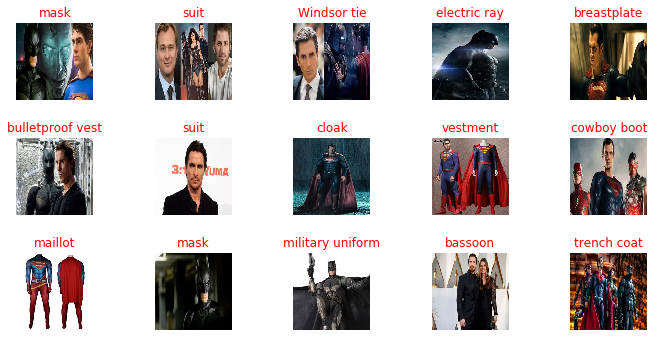

In [95]:
plot_images(image_batch, labels_batch, predicted_class_names)

## Downloading headless model

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [98]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

## Adding a classification head

In [100]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


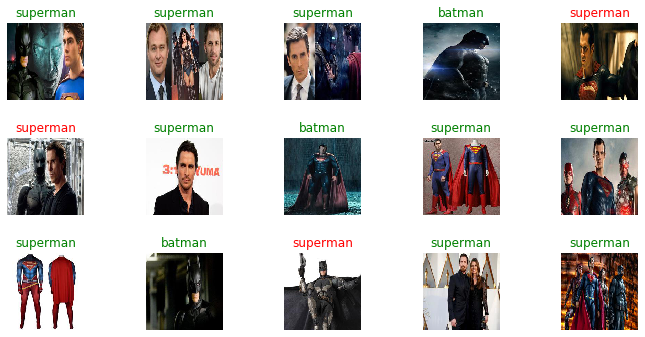

In [101]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Train the model

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [103]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/5
5/5 [==============================] - 33s 7s/step - loss: 0.9727 - accuracy: 0.6500 - val_loss: 0.5575 - val_accuracy: 0.8100
Epoch 2/5
5/5 [==============================] - 28s 6s/step - loss: 0.5692 - accuracy: 0.7875 - val_loss: 0.8449 - val_accuracy: 0.7300
Epoch 3/5
5/5 [==============================] - 28s 6s/step - loss: 0.8929 - accuracy: 0.6993 - val_loss: 0.5154 - val_accuracy: 0.7500
Epoch 4/5
5/5 [==============================] - 30s 6s/step - loss: 0.7293 - accuracy: 0.7250 - val_loss: 0.5429 - val_accuracy: 0.7100
Epoch 5/5
5/5 [==============================] - 28s 6s/step - loss: 0.2712 - accuracy: 0.8758 - val_loss: 0.5804 - val_accuracy: 0.7000


## Check results

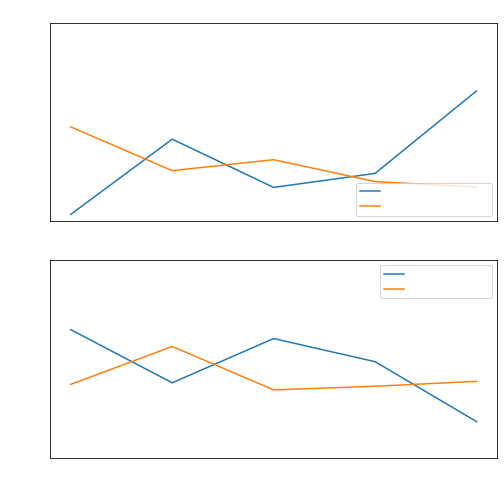

In [104]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

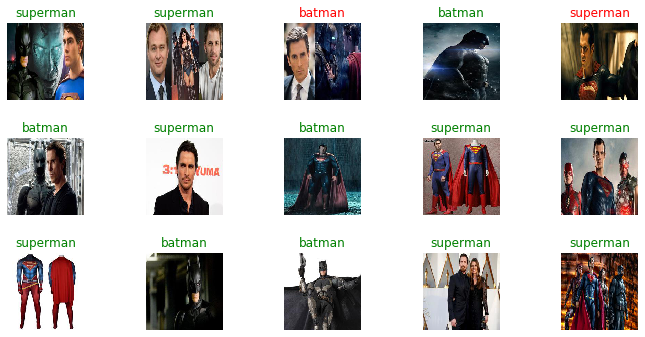

In [105]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)

##Application base model

In [0]:
base_model = ResNet50V2(input_shape=IMAGE_SIZE+(3,),
                                               include_top=False,
                                               weights='imagenet')

In [0]:
base_model.trainable = False

In [108]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [109]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [111]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/5
5/5 [==============================] - 38s 8s/step - loss: 0.7618 - accuracy: 0.6000 - val_loss: 0.6480 - val_accuracy: 0.7400
Epoch 2/5
5/5 [==============================] - 33s 7s/step - loss: 0.7454 - accuracy: 0.6687 - val_loss: 0.4588 - val_accuracy: 0.7100
Epoch 3/5
5/5 [==============================] - 34s 7s/step - loss: 0.4585 - accuracy: 0.8125 - val_loss: 0.7225 - val_accuracy: 0.7500
Epoch 4/5
5/5 [==============================] - 35s 7s/step - loss: 0.4062 - accuracy: 0.8313 - val_loss: 0.5266 - val_accuracy: 0.7500
Epoch 5/5
5/5 [==============================] - 34s 7s/step - loss: 0.3138 - accuracy: 0.8875 - val_loss: 0.4990 - val_accuracy: 0.7700


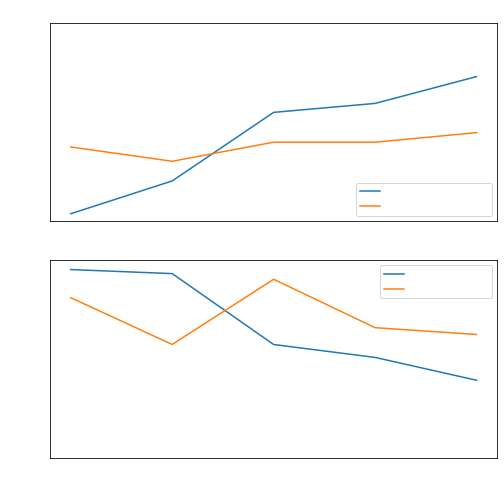

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.8])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

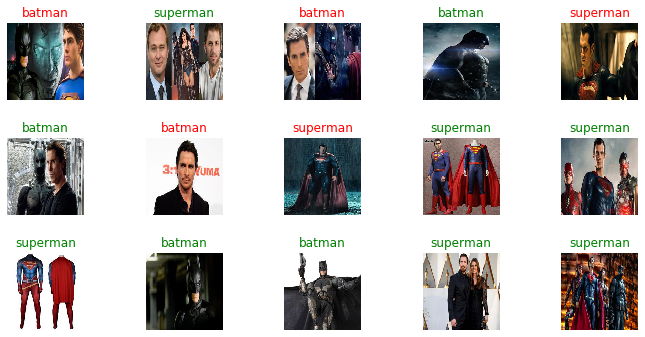

In [113]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Fine tuning

In [0]:
base_model.trainable = True

In [115]:
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 160
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


Number of layers in the base model:  190


In [116]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 16,542,721
Non-trainable params: 9,121,280
_________________________________________________________________


In [117]:
initial_epochs = 5
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch=5,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_data_gen)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 5/10
5/5 [==============================] - 44s 9s/step - loss: 0.8169 - accuracy: 0.7516 - val_loss: 3.1156 - val_accuracy: 0.5400
Epoch 6/10
5/5 [==============================] - 41s 8s/step - loss: 0.4033 - accuracy: 0.8431 - val_loss: 3.9613 - val_accuracy: 0.5200
Epoch 7/10
5/5 [==============================] - 42s 8s/step - loss: 0.4987 - accuracy: 0.7688 - val_loss: 1.7839 - val_accuracy: 0.7200
Epoch 8/10
5/5 [==============================] - 43s 9s/step - loss: 0.4962 - accuracy: 0.7625 - val_loss: 3.4880 - val_accuracy: 0.7100
Epoch 9/10
5/5 [==============================] - 42s 8s/step - loss: 0.4405 - accuracy: 0.8125 - val_loss: 5.7874 - val_accuracy: 0.6700
Epoch 10/10
5/5 [==============================] - 41s 8s/step - loss: 0.3944 - accuracy: 0.9020 - val_loss: 11.9069 - val_accuracy: 0.6400


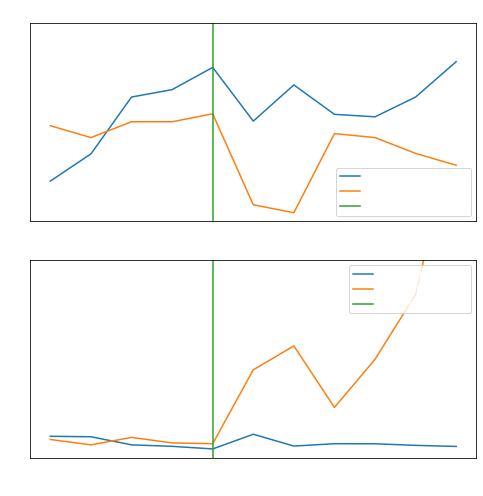

In [118]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 7.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

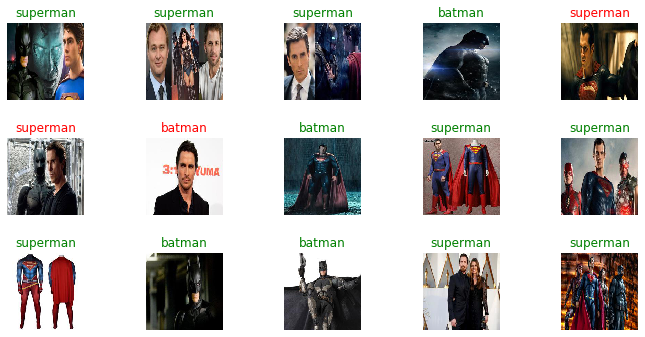

In [119]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)